In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

In [43]:
chronic_kidney_disease_dataframe = pd.read_csv('chronic_kidney_disease.csv')

In [44]:
#Description of Datasets

#Print number of records and attributes of whole kidney dataset
print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
print('')

#call function created to check for null values
null_values_check(chronic_kidney_disease_dataframe)

#Missing value imputation
#replace ? to nan values
chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.


In [47]:
#set the features and the target variables
target_class = chronic_kidney_disease_dataframe['class']
print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
feature_classes = chronic_kidney_disease_dataframe.iloc[:, 0:24]
print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))

#KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
knn_missing_values_imputer = KNNImputer(n_neighbors=5)
feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))


Are there missing values in Target Class? False

Are there missing values in the Features? 
age       True
bp        True
sg        True
al        True
su        True
rbc      False
pc       False
pcc      False
ba       False
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

Now, Are there any missing values in Features? age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool


In [48]:
#Scaling and normalization of features
standard_feature_scaler = StandardScaler()
feature_classes = standard_feature_scaler.fit_transform(feature_classes)
feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])

In [52]:
#Encoding target class using label encoding
target_label_encoder = preprocessing.LabelEncoder()
target_class = target_label_encoder.fit_transform(target_class)
target_class1 = pd.DataFrame(target_class, columns=['class'])
    
#split the dataset into training and testing data
train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3)

print('\nAfter Pre-processing:')
print('Size of train dataset: ' + str(train_target.shape[0]))
print('Size of test dataset: ' + str(test_target.shape[0]))


After Pre-processing:
Size of train dataset: 280
Size of test dataset: 120


C:\Users\Shubhankar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


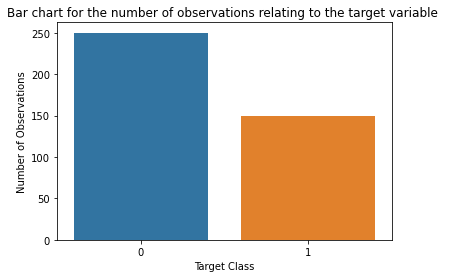

In [55]:
#Target class Visualisatiom

#graph a count plot to check the number of observations relative to the target variable
sns.countplot(pd.concat([feature_classes, target_class1], axis=1, sort=False)['class'], label = "Count")
plt.title('Bar chart for the number of observations relating to the target variable ')
plt.xlabel('Target Class')
plt.ylabel('Number of Observations')
plt.show()

In [56]:
#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}

In [61]:
#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(train_features, train_target)

GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy')

In [64]:
#svm predictions on test features
svm_prediction = svm_grid_search.predict(test_features)

#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))


Precision: 0.9122807017543859
Accuracy: 0.95
Recall: 0.9811320754716981
F1-score: 0.9454545454545454



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.91      0.98      0.95        53

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120


Confusion Matrix: 
[[62  5]
 [ 1 52]]


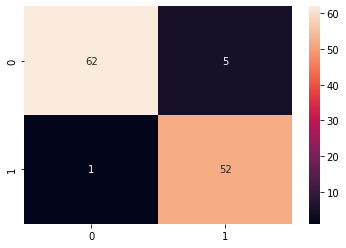

In [65]:
#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()

In [66]:
#initialise empty lists
svm_C = []
svm_gamma = []
svm_kernel = []
svm_shrinking = []
svm_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in svm_grid_search.cv_results_['mean_test_score']:
        svm_accuracy.append(each_accuracy)

In [67]:
#loop through the parameter combinations to get each parameter value
for each_parameter_combination in svm_grid_search.cv_results_['params']:
    svm_C.append(each_parameter_combination['C'])
    svm_gamma.append(each_parameter_combination['gamma'])
    svm_kernel.append(each_parameter_combination['kernel'])
    svm_shrinking.append(each_parameter_combination['shrinking'])

#merge all the above lists into one single dataframe to summarize the SVM cross validation result
cross_validation_results_df = pd.DataFrame(svm_C, columns = ['C'])
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_gamma, columns = ['gamma']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_kernel, columns = ['kernel']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_shrinking, columns = ['shrinking']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_accuracy, columns = ['Accuracy']))

In [68]:
#encode the categorical SVM parameters of kernel, Shrinking and Gamma
svm_plot_encoder = preprocessing.LabelEncoder()
encoded_kernel = svm_plot_encoder.fit_transform(cross_validation_results_df['kernel'])
encoded_shrinking = svm_plot_encoder.fit_transform(cross_validation_results_df['shrinking'])
encoded_gamma = svm_plot_encoder.fit_transform(cross_validation_results_df['gamma'])

print('Please note that Shrinking has been encoded whereby 0 = False, 1 = True')
print('Please note that Gamma has been encoded whereby 0 = auto, 1 = scale')

#Save best model parameters
svm_best_parameters = svm_grid_search.best_params_

Please note that Shrinking has been encoded whereby 0 = False, 1 = True
Please note that Gamma has been encoded whereby 0 = auto, 1 = scale


In [2]:
svm_best_parameters.predict([[48,80,1.02,1,0,0,0,1,1,121,36,1.2,111,110,15.4,44,7800,5.2,0,0,1,1,1,1]])


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform

class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)

def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D,'annotate3D',_annotate3D)

NameError: name 'svm_best_parameters' is not defined

In [3]:
#For annotation purposes
best_accuracy_svm = max(cross_validation_results_df['Accuracy'])
best_C_svm = svm_best_parameters['C']
best_gamma_svm = svm_best_parameters['gamma']
best_kernel_svm = svm_best_parameters['kernel']
best_shrinking_svm = svm_best_parameters['shrinking']

#encoding best shrinking
if (best_shrinking_svm == 'False'):
    best_shrinking_svm = 0
elif (best_shrinking_svm == 'True'):
    best_shrinking_svm = 1

#encoding best Gamma
if (best_gamma_svm == 'auto'):
    best_gamma_svm = 0
elif (best_gamma_svm == 'scale'):
    best_gamma_svm = 1

NameError: name 'cross_validation_results_df' is not defined

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_892/888793618.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig1)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_892/2606130822.py:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x2, y2, z2 = proj_transform(*self._xyz, renderer.M)


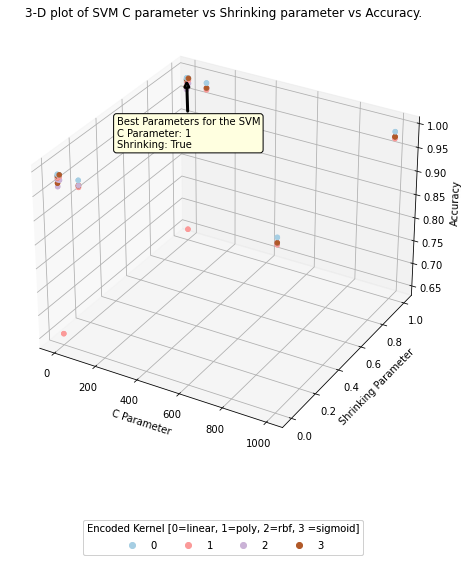

In [73]:
#PLOT 1: C vs Shrinking Vs Accuracy Plot
#assign a 6x6 figure size
fig1 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax1 = Axes3D(fig1)
#plot a 3-D scatter plot
scatter1 = ax1.scatter(cross_validation_results_df['C'], encoded_shrinking, 
                      cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax1.set_title('3-D plot of SVM C parameter vs Shrinking parameter vs Accuracy.')
ax1.set_xlabel('C Parameter')
ax1.set_ylabel('Shrinking Parameter')
ax1.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend1 = ax1.legend(*scatter1.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax1.add_artist(legend1)
#annotation
parameters_annotation1 = 'Best Parameters for the SVM\nC Parameter: ' + str(best_C_svm) + '\nShrinking: ' + str(best_shrinking_svm)
ax1.annotate3D(parameters_annotation1, (best_C_svm, best_shrinking_svm, best_accuracy_svm), xytext=(-70,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_892/147232436.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax2 = Axes3D(fig2)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_892/2606130822.py:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x2, y2, z2 = proj_transform(*self._xyz, renderer.M)


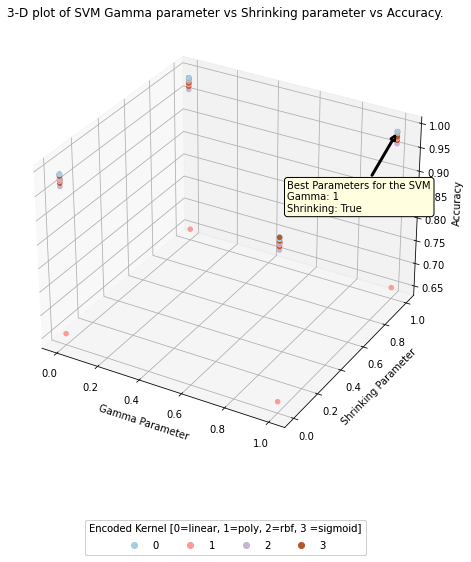

In [74]:
#PLOT 2: Gamma vs Shrinking Vs Accuracy Plot
#assign a 6x6 figure size
fig2 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax2 = Axes3D(fig2)
#plot a 3-D scatter plot
scatter2 = ax2.scatter(encoded_gamma, encoded_shrinking,
                       cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax2.set_title('3-D plot of SVM Gamma parameter vs Shrinking parameter vs Accuracy.')
ax2.set_xlabel('Gamma Parameter')
ax2.set_ylabel('Shrinking Parameter')
ax2.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax2.add_artist(legend2)
#annotation
parameters_annotation2 = 'Best Parameters for the SVM\nGamma: ' + str(best_gamma_svm) + '\nShrinking: ' + str(best_shrinking_svm)
ax2.annotate3D(parameters_annotation2, (best_gamma_svm, best_shrinking_svm, best_accuracy_svm), xytext=(-110,-80), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_892/828009697.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3 = Axes3D(fig3)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_892/2606130822.py:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x2, y2, z2 = proj_transform(*self._xyz, renderer.M)


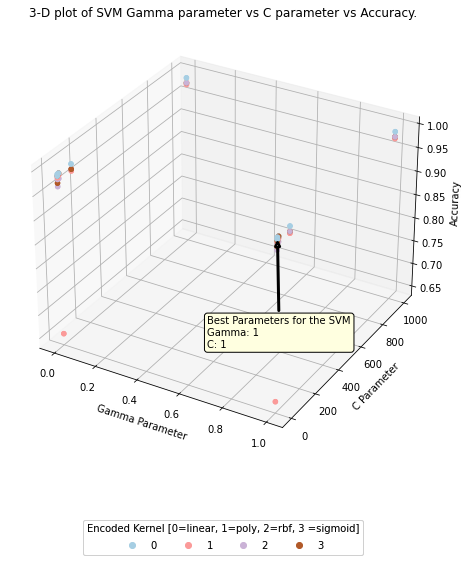

In [75]:
#PLOT 3: Gamma vs C Vs Accuracy Plot
#assign a 6x6 figure size
fig3 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax3 = Axes3D(fig3)
#plot a 3-D scatter plot
scatter3 = ax3.scatter(encoded_gamma, cross_validation_results_df['C'],
                       cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax3.set_title('3-D plot of SVM Gamma parameter vs C parameter vs Accuracy.')
ax3.set_xlabel('Gamma Parameter')
ax3.set_ylabel('C Parameter')
ax3.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend3 = ax3.legend(*scatter3.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax3.add_artist(legend3)
#annotation
parameters_annotation3 = 'Best Parameters for the SVM\nGamma: ' + str(best_gamma_svm) + '\nC: ' + str(best_C_svm)
ax3.annotate3D(parameters_annotation3, (best_gamma_svm, best_C_svm, best_accuracy_svm), xytext=(-70,-110), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()